**Importing required libraies**

In [2]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

**Importing Train DataSet**

In [6]:
# loading the data from csv file to a pandas dataframe

df = pd.read_csv('/content/train.csv')

In [7]:
# printing the first 5 columns of the dataframe
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# last 5 rows of the dataframe
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
df['datetime'] = pd.to_datetime(df['datetime'],infer_datetime_format=True)# changing data dtype to datatime64
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [13]:
df=df.drop('datetime',axis = 1)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


<Axes: title={'center': 'Correlation Matrix'}>

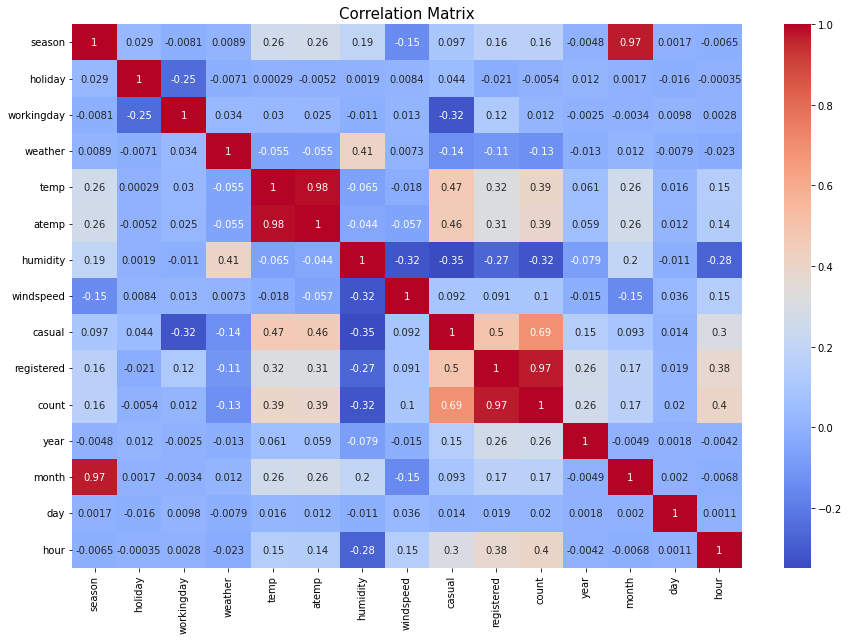

In [14]:
#correlation matrix

import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('Correlation Matrix',fontsize=15)

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [15]:
df=df.drop(['season','atemp'],axis=1)

In [16]:
df

,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,0,0,1,9.84,81,0.0000,3,13,16,2011,1,1,0
1,0,0,1,9.02,80,0.0000,8,32,40,2011,1,1,1
2,0,0,1,9.02,80,0.0000,5,27,32,2011,1,1,2
3,0,0,1,9.84,75,0.0000,3,10,13,2011,1,1,3
4,0,0,1,9.84,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,50,26.0027,7,329,336,2012,12,19,19
10882,0,1,1,14.76,57,15.0013,10,231,241,2012,12,19,20
10883,0,1,1,13.94,61,15.0013,4,164,168,2012,12,19,21
10884,0,1,1,13.94,61,6.0032,12,117,129,2012,12,19,22


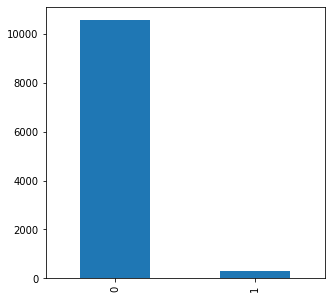

In [17]:
plt.figure(1, figsize=(5,5))
df['holiday'].value_counts().plot.bar()
plt.show()

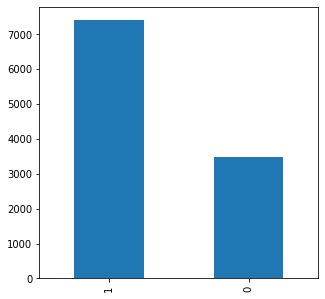

In [18]:
plt.figure(1, figsize=(5,5))
df['workingday'].value_counts().plot.bar()
plt.show()

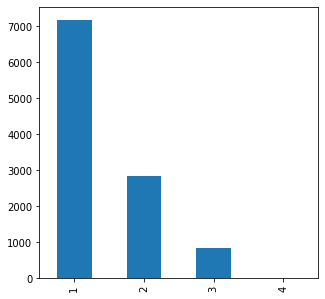

In [19]:
plt.figure(1, figsize=(5,5))
df['weather'].value_counts().plot.bar()
plt.show()

In [20]:
# use get_dummies on cat columns 
dummy_df = pd.get_dummies(df, columns=["holiday", "workingday","weather","year"])

# concatenate the dummy variables with the original dataframe
df1 = pd.concat([df, dummy_df], axis=1)

# drop original columns 
df1 = df1.drop(["holiday", "workingday","weather","year"], axis=1)
df1


,temp,humidity,windspeed,casual,registered,count,month,day,hour,temp,...,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012
0,9.84,81,0.0000,3,13,16,1,1,0,9.84,...,1,0,1,0,1,0,0,0,1,0
1,9.02,80,0.0000,8,32,40,1,1,1,9.02,...,1,0,1,0,1,0,0,0,1,0
2,9.02,80,0.0000,5,27,32,1,1,2,9.02,...,1,0,1,0,1,0,0,0,1,0
3,9.84,75,0.0000,3,10,13,1,1,3,9.84,...,1,0,1,0,1,0,0,0,1,0
4,9.84,75,0.0000,0,1,1,1,1,4,9.84,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,50,26.0027,7,329,336,12,19,19,15.58,...,1,0,0,1,1,0,0,0,0,1
10882,14.76,57,15.0013,10,231,241,12,19,20,14.76,...,1,0,0,1,1,0,0,0,0,1
10883,13.94,61,15.0013,4,164,168,12,19,21,13.94,...,1,0,0,1,1,0,0,0,0,1
10884,13.94,61,6.0032,12,117,129,12,19,22,13.94,...,1,0,0,1,1,0,0,0,0,1


In [21]:
def train_test_split(X, y, test_size=0.2, random_state=None):

    
    # Shuffle the data
    if random_state is not None:
        np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    X_shuffled = X.iloc[shuffled_indices]
    y_shuffled = y.iloc[shuffled_indices]
    
    # Calculate the number of instances in the test subset
    n_test = int(len(X) * test_size)
    
    # Split the data
    X_train = X_shuffled[:-n_test]
    X_test = X_shuffled[-n_test:]
    y_train = y_shuffled[:-n_test]
    y_test = y_shuffled[-n_test:]
    
    return X_train, X_test, y_train, y_test



In [22]:
X = df.drop(columns=['count'], axis=1)
y = df['count']


In [23]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
print(X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)

(8709, 12)
(2177, 12)
(8709,)
(2177,)


**Model Building**

In [ ]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=2):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)
        
    def build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        
        if depth == self.max_depth or n_samples == 5:
            return np.mean(y)
        
        feature_idxs = np.random.choice(n_features, size=2, replace=False)
        best_feature, best_threshold = self.find_best_split(X, y, feature_idxs)
        
        if best_threshold is None:
            return np.mean(y)
        
        left_idxs = X[:, best_feature] < best_threshold
        right_idxs = X[:, best_feature] >= best_threshold
        
        left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1)
        right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1)
        
        return (best_feature, best_threshold, left_tree, right_tree)
    
    def find_best_split(self, X, y, feature_idxs):
        best_score = float('inf')
        best_feature = None
        best_threshold = None
        
        for feature in feature_idxs:
            thresholds = np.unique(X[:, feature])
            
            for threshold in thresholds:
                left_idxs = X[:, feature] < threshold
                right_idxs = X[:, feature] >= threshold
                
                if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
                    continue
                
                score = self.split_score(y, y[left_idxs], y[right_idxs])
                
                if score < best_score:
                    best_score = score
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold
    
    def split_score(self, y, y_left, y_right):
        p_left = len(y_left) / len(y)
        p_right = len(y_right) / len(y)
        
        score = p_left * np.var(y_left) + p_right * np.var(y_right)
        
        return score
    
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])
    
    def traverse_tree(self, x, node):
        if isinstance(node, float):
            return node
        
        feature, threshold, left_tree, right_tree = node
        
        if x[feature] < threshold:
            if isinstance(left_tree,float):
                return left_tree
            else:
                return self.traverse_tree(x, right_tree)
        else:
            if isinstance(right_tree,float):
                return right_tree
            else:
                return self.traverse_tree(x,right_tree)
        
class RandomForestRegressor:
    def __init__(self, n_trees=15, max_depth=2, subsample_size=0.5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_size = subsample_size
        self.trees = []
        
    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            n_samples = len(X)
            subsample_size = int(self.subsample_size * n_samples)
            subsample_idxs = np.random.choice(range(n_samples), size=subsample_size, replace=True)
            X_sub = X.iloc[subsample_idxs]
            y_sub = y.iloc[subsample_idxs]
            tree.fit(X_sub.values, y_sub.values)
            #tree.fit(X[subsample_idxs], y[subsample_idxs])
            self.trees.append(tree)
            
    def predict(self, X):
        if isinstance(X, (int, float)):
            X = np.array([[X]])
        elif isinstance(X, pd.Series):
            X = X.values.reshape(1, n_features)
        else:
            X = X.values
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [ ]:
rf = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)
rf.fit(X_train, y_train)

In [ ]:
# Make predictions on the train set
y_train_pred = rf.predict(X_train)

# Calculate mean absolute error
mae_train = np.abs(y_train.values - y_train_pred).mean()

# Calculate mean absolute error
print("Mean Absolute Error:", mae_train)

Mean Absolute Error: 0.892417927551918


In [ ]:
class GridSearchCV:
    def __init__(self, estimator, param_grid, cv=5):
        self.estimator = estimator
        self.param_grid = param_grid
        self.cv = cv
    
    def fit(self, X, y):
        param_combinations = list(itertools.product(*self.param_grid.values()))
        best_params = None
        best_score = float('inf')
        for params in param_combinations:
            param_dict = dict(zip(self.param_grid.keys(), params))
            estimator = self.estimator(**param_dict)
            scores = []
            n_samples = len(X)
            fold_size = n_samples // self.cv
            for i in range(self.cv):
                start = i * fold_size
                end = (i+1) * fold_size if i != self.cv-1 else n_samples
                X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
                y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
                X_test = X.iloc[start:end]
                y_test = y.iloc[start:end]
                estimator.fit(X_train, y_train)
                y_pred = estimator.predict(X_test)
                score = np.mean((y_test - y_pred)**2)
                scores.append(score)
            avg_score = np.mean(scores)
            if avg_score < best_score:
                best_score = avg_score
                best_params = param_dict
        self.best_params_ = best_params
        self.best_estimator_ = self.estimator(**best_params)
        self.best_estimator_.fit(X, y)
        self.cv_results_ = {'params': [], 'mean_test_score': []}
        for params in param_combinations:
            param_dict = dict(zip(self.param_grid.keys(), params))
            self.cv_results_['params'].append(param_dict)
            estimator = self.estimator(**param_dict)
            scores = []
            n_samples = len(X)
            fold_size = n_samples // self.cv
            for i in range(self.cv):
                start = i * fold_size
                end = (i+1) * fold_size if i != self.cv-1 else n_samples
                X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
                y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
                X_test = X.iloc[start:end]
                y_test = y.iloc[start:end]
                estimator.fit(X_train, y_train)
                y_pred = estimator.predict(X_test)
                score = np.mean((y_test - y_pred)**2)
                scores.append(score)
            avg_score = np.mean(scores)
            self.cv_results_['mean_test_score'].append(avg_score)
        return self

# Define the parameter grid
param_grid = {
    'n_trees': [10, 20],
    'max_depth': [2, 4],
    'subsample_size': [0.5, 0.7]
}

# Define the estimator
estimator = RandomForestRegressor

# Perform grid search
grid_search = GridSearchCV(estimator, param_grid)
grid_search.fit(X_train, y_train)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best score:", np.mean((y_test - grid_search.best_estimator_.predict(X_test))**2))

Best parameters: {'n_trees': 20, 'max_depth': 2, 'subsample_size': 0.7}
Best score: 1.0108286565437774


In [ ]:
rf = RandomForestRegressor(n_trees=20, max_depth=2, subsample_size=0.7)
rf.fit(X_train, y_train)

In [ ]:
# Make predictions on the train set
y_train_pred = rf.predict(X_train)

# Calculate mean absolute error
mae_train = np.abs(y_train.values - y_train_pred).mean()

# Calculate mean absolute error
print("Mean Absolute Error:", mae_train)


Mean Absolute Error: 0.7574396971915072


In [ ]:
# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Calculate mean absolute error
mae_test = np.abs(y_test.values - y_test_pred).mean()

# Calculate mean absolute error
print("Mean Absolute Error:", mae_test)


Mean Absolute Error: 0.7691905987366083
